In [47]:
import pandas as pd
import geopandas
from geopandas import GeoDataFrame
from pandas import Series
from shapely.geometry import Point, MultiPoint, LineString, MultiLineString, Polygon
import itertools
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import datetime 

In [48]:
def ReadData(bestand):
    
    data = pd.read_csv( bestand, sep=',' ,header=(0),low_memory=False, parse_dates=['date_time'], dayfirst=True)

    data = data.drop(['colony_longitude', 'colony_latitude','calc_sunlight','calc_corine_value','device_info_serial','project_leader','ring_code','colour_ring_code','species_code','scientific_name','catch_weight','sex','catch_location','tracking_started_at','tracking_ended_at','is_active','remarks','altitude','pressure','temperature','satellites_used','gps_fixtime','positiondop','h_accuracy','v_accuracy','x_speed','y_speed','z_speed','speed_accuracy','userflag','speed_3d','speed_2d','altitude_agl','calc_year','calc_month','calc_hour','calc_distance_diff','calc_speed_2d','calc_distance_to_colony','calc_outlier','calc_corine_legend','ESA.land.cover'], axis=1)
    
    punt= [Point(xy) for xy in zip(data.longitude, data.latitude)]
    crs = {'init': 'epsg:4326'} #crs toekennen
    data = GeoDataFrame(data, crs=crs, geometry=punt)
    data = data.to_crs(epsg=31370)
    
    return data

def GetData(data):
    
    dfdict = dict(tuple(data.groupby('bird_name')))
    
    meeuwen = list(dfdict.keys())

    return dfdict, meeuwen

In [49]:
data = ReadData(r'C:\Users\maart\OneDrive\Master\Projectwerk Geo-ICT\data.geo.ict.csv')
dfdict, meeuwen = GetData(data)

Temporele resoluties van data beschrijven (minima, maxima, gemiddelde) 

In [50]:
data.groupby('bird_name').calc_time_diff.describe()

,count,mean,std,min,25%,50%,75%,max
bird_name,,,,,,,,
Anne,215960.0,500.895578,6250.494850,2.0,43.0,175.0,432.0,1059152.0
Bram,13534.0,517.129008,497.792801,168.0,176.0,179.0,1200.0,3694.0
Brigitte,28874.0,266.766364,344.970200,169.0,176.0,176.0,177.0,7272.0
Catia,496298.0,191.079904,504.874080,3.0,4.0,10.0,174.0,8733.0
Ceryl,238896.0,293.237982,572.388538,3.0,10.0,47.0,175.0,7412.0
Claude,20300.0,348.431182,390.961466,166.0,176.0,176.0,186.0,7272.0
Dre,183804.0,312.953113,1949.721230,3.0,175.0,176.0,181.0,330809.0
Eva,186795.0,320.394454,16589.975494,2.0,3.0,4.0,177.0,6845218.0
Fien,146518.0,208.975894,437.363046,4.0,10.0,10.0,111.0,6778.0


Kleinste Temporele resoluties ophalen

In [51]:
data.groupby('bird_name').calc_time_diff.describe()[['min','mean','75%']]

,min,mean,75%
bird_name,,,
Anne,2.0,500.895578,432.0
Bram,168.0,517.129008,1200.0
Brigitte,169.0,266.766364,177.0
Catia,3.0,191.079904,174.0
Ceryl,3.0,293.237982,175.0
Claude,166.0,348.431182,186.0
Dre,3.0,312.953113,181.0
Eva,2.0,320.394454,177.0
Fien,4.0,208.975894,111.0


<bound method Artist.get_figure of <matplotlib.axes._subplots.AxesSubplot object at 0x0000016873B35208>>

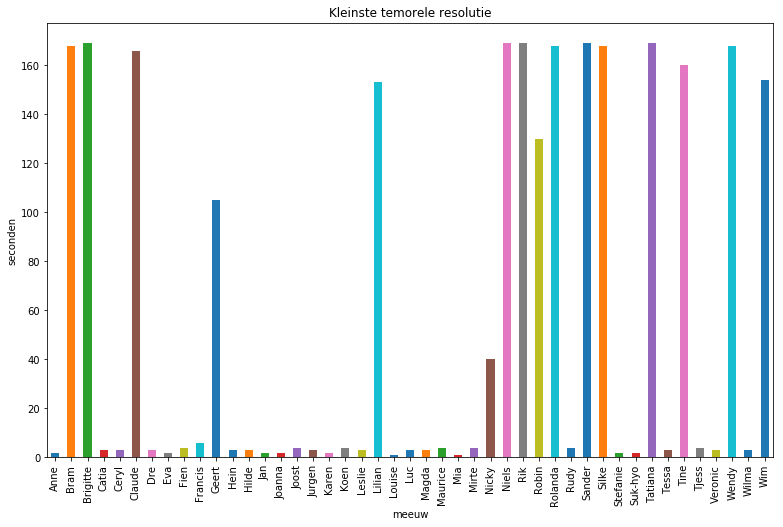

In [52]:
ax = data.groupby('bird_name').calc_time_diff.describe()['min'].plot(kind='bar', figsize=(13,8), title='Kleinste temorele resolutie')
ax.set_ylabel("seconden")
ax.set_xlabel("meeuw")
ax.get_figure

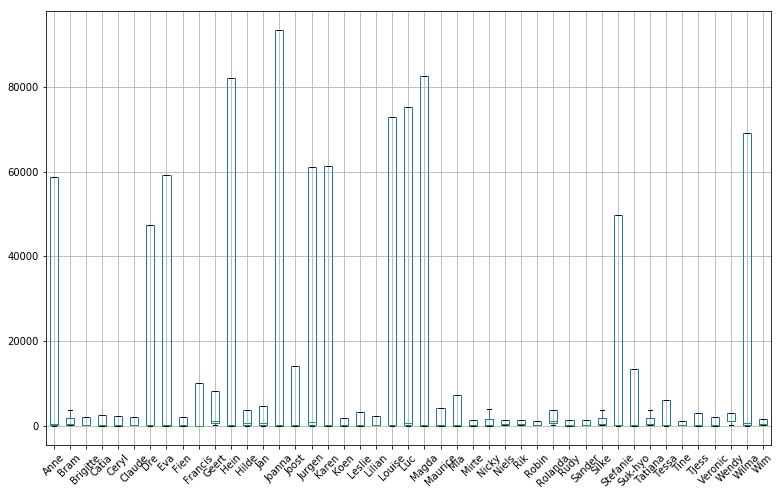

In [9]:
data.groupby('bird_name').calc_time_diff.describe().transpose().boxplot(showfliers=False, figsize= (13,8), rot=45)

In [11]:
data.groupby('bird_name').date_time.describe()

,count,unique,top,freq,first,last
bird_name,,,,,,
Anne,215961,215961,2016-03-05 00:46:01,1,2013-05-24 18:23:38,2016-10-27 18:33:47
Bram,13535,13535,2017-08-13 18:42:21,1,2017-05-31 18:15:58,2017-08-20 18:23:02
Brigitte,28875,28875,2017-07-31 09:24:24,1,2017-05-24 18:16:33,2017-08-21 21:53:25
Catia,496299,496299,2014-06-29 14:50:27,1,2014-05-23 18:10:48,2017-05-25 08:33:42
Ceryl,238897,238897,2016-08-17 06:20:35,1,2015-06-09 18:01:32,2017-08-28 13:17:53
Claude,20301,20301,2017-06-11 03:36:39,1,2017-05-31 18:10:13,2017-08-21 14:56:06
Dre,183805,183805,2015-10-30 12:53:46,1,2015-05-21 18:04:27,2017-03-17 12:25:01
Eva,186796,186796,2016-04-06 13:25:10,1,2015-05-21 18:05:58,2017-04-13 10:34:00
Fien,146519,146519,2016-07-16 12:00:35,1,2016-05-23 18:04:09,2017-05-13 03:16:19


Meeuwen bepalen met de 'hoogste' temporele resoluties (minimale waarde voor tijdsverschillen) --> meeuwen_hightemp
Meeuwen bepalen waarbij een 25% van de data een hoog genoege temporele resolutie heeft --> meewen_hightemp25

In [43]:
mintempres = data.groupby('bird_name').calc_time_diff.describe()['min']
mintempres[mintempres < 5.0]
meeuwen_hightemp = list(mintempres[mintempres < 5.0].index)
meeuwen_hightemp

tempres25 = data.groupby('bird_name').calc_time_diff.describe()['25%']
tempres25[mintempres < 5.0]
meeuwen_hightemp25 = list(tempres25[tempres25 < 5.0].index)
meeuwen_hightemp25

['Catia', 'Eva', 'Joanna', 'Louise', 'Suk-hyo']

Bepalen wat de tijdsintervallen zijn van de meeuwen met deze hoge temporele resoluties

In [53]:
TI = data.groupby('bird_name').date_time.describe()[['first','last']]
TI[TI.index.isin(meeuwen_hightemp25)]

,first,last
bird_name,,
Catia,2014-05-23 18:10:48,2017-05-25 08:33:42
Eva,2015-05-21 18:05:58,2017-04-13 10:34:00
Joanna,2015-06-02 18:00:37,2017-07-05 03:56:40
Louise,2015-05-26 18:04:03,2017-04-03 18:18:29
Suk-hyo,2015-06-09 18:01:07,2017-08-11 03:37:53


Meeuwen plotten met hoge temporele resolutie

In [56]:
data.groupby('bird_name').get_group('Bram')

,bird_name,date_time,latitude,longitude,direction,calc_time_diff,behaviour,geometry
215961,Bram,2017-05-31 18:15:58,51.347707,3.172846,138.460094,NaN,Stationary,POINT (66678.07506600839 227106.81139223)
215962,Bram,2017-05-31 18:36:14,51.347763,3.172849,147.084686,1216.0,Stationary,POINT (66678.39828544171 227113.0375825958)
215963,Bram,2017-05-31 18:56:25,51.347747,3.172881,-113.961700,1211.0,Stationary,POINT (66680.58358075557 227111.1329858182)
215964,Bram,2017-05-31 19:16:40,51.347206,3.169261,-103.698068,1215.0,Peck,POINT (66427.41370906765 227055.0148810344)
215965,Bram,2017-05-31 19:37:06,51.340016,3.174974,-111.254950,1226.0,Peck,POINT (66812.58286619144 226248.8455960993)
215966,Bram,2017-05-31 19:57:22,51.348020,3.169983,-106.195158,1216.0,NaN,POINT (66479.23051669751 227144.7785456739)
215967,Bram,2017-05-31 20:17:17,51.347945,3.170026,-143.452623,1195.0,Peck,POINT (66482.06471869411 227136.4539542627)
215968,Bram,2017-05-31 20:37:17,51.348263,3.169855,-91.500448,1200.0,Peck,POINT (66470.73618806429 227171.9888252905)
215969,Bram,2017-05-31 20:57:17,51.348008,3.169913,-94.640342,1200.0,Float,POINT (66474.29183645247 227143.6008350039)
215970,Bram,2017-05-31 21:57:43,51.347831,3.170016,95.075734,3626.0,Peck,POINT (66481.13537423773 227123.7724772906)


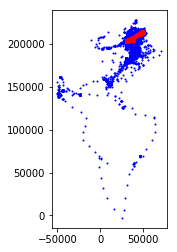

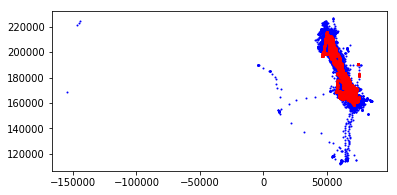

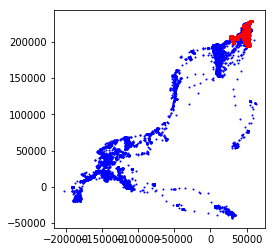

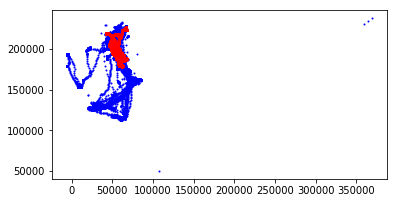

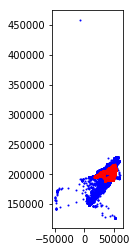

In [65]:
for meeuw in meeuwen_hightemp25:
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    dfdict[meeuw][dfdict[meeuw].calc_time_diff >= 5].geometry.plot(ax=ax, marker='o', color='blue', markersize=1)
    dfdict[meeuw][dfdict[meeuw].calc_time_diff < 5].geometry.plot(ax=ax, marker='o', color='red', markersize=1)
    plt.show()

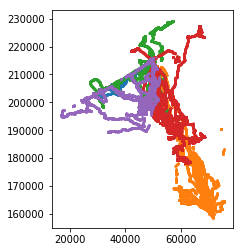

In [69]:
fig, ax = plt.subplots()
for meeuw in meeuwen_hightemp25:
    ax.set_aspect('equal')
    dfdict[meeuw][dfdict[meeuw].calc_time_diff < 5].geometry.plot(ax=ax, marker='o', markersize=1)
plt.show()

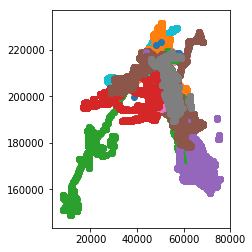

In [78]:
fig, ax = plt.subplots()
for meeuw in meeuwen:
    dfdict[meeuw][dfdict[meeuw].calc_time_diff < 5].geometry.plot(ax=ax)
plt.show()